In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


(60000, 28, 28, 1)


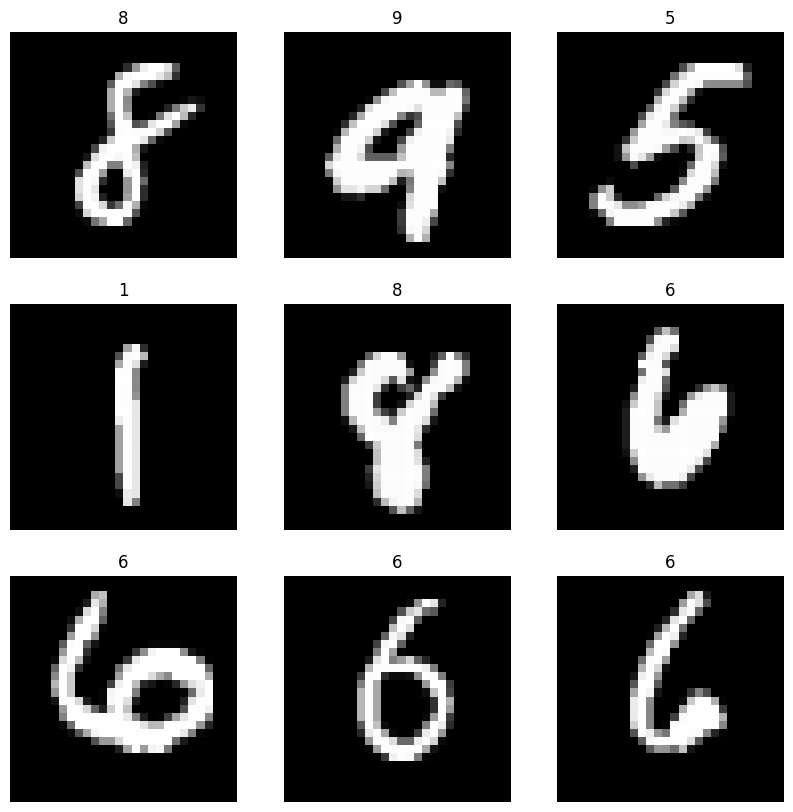

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
# normalise data
x_train_norm = x_train / 255
x_test_norm = x_test / 255
print(x_train_norm.shape)

sample_idxs = np.random.choice(x_test.shape[0], size=9)
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(9):
  axs[i//3, i%3].imshow(x_train_norm[sample_idxs[i]], cmap=plt.get_cmap('gray'))
  axs[i//3, i%3].axis('off')
  axs[i//3, i%3].set_title(str(y_train[sample_idxs[i]]))


In [ ]:
#@title One-hot encoding

onehot_enc = OneHotEncoder(sparse_output=False)
y_train = y_train.reshape(len(y_train), 1)
y_onehot_train = onehot_enc.fit_transform(y_train)
y_test = y_test.reshape(len(y_test), 1)
y_onehot_test = onehot_enc.fit_transform(y_test)

print(y_test[333])
print(y_onehot_test[333])

[5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#@title Define model and plotting function

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), input_shape=(28,28,1), padding="same", activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

# I'm using categorical_crossentropy because I'm using one-hot encoding
# if I used integer labels I'd use sparse_categorical_crossentropy
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=["accuracy"])

def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

Epoch 1/50
422/422 [==============================] - 9s 21ms/step - loss: 0.5689 - accuracy: 0.8240 - val_loss: 0.1655 - val_accuracy: 0.9627
Epoch 2/50
422/422 [==============================] - 9s 20ms/step - loss: 0.4928 - accuracy: 0.8499 - val_loss: 0.1345 - val_accuracy: 0.9703
Epoch 3/50
422/422 [==============================] - 9s 20ms/step - loss: 0.4485 - accuracy: 0.8644 - val_loss: 0.1268 - val_accuracy: 0.9722
Epoch 4/50
422/422 [==============================] - 9s 20ms/step - loss: 0.4182 - accuracy: 0.8747 - val_loss: 0.1291 - val_accuracy: 0.9722
Epoch 5/50
422/422 [==============================] - 8s 19ms/step - loss: 0.3923 - accuracy: 0.8834 - val_loss: 0.1264 - val_accuracy: 0.9712
Epoch 6/50
422/422 [==============================] - 9s 20ms/step - loss: 0.3670 - accuracy: 0.8914 - val_loss: 0.1152 - val_accuracy: 0.9762
Epoch 7/50
422/422 [==============================] - 9s 20ms/step - loss: 0.3492 - accuracy: 0.8960 - val_loss: 0.1062 - val_accuracy: 0.9760

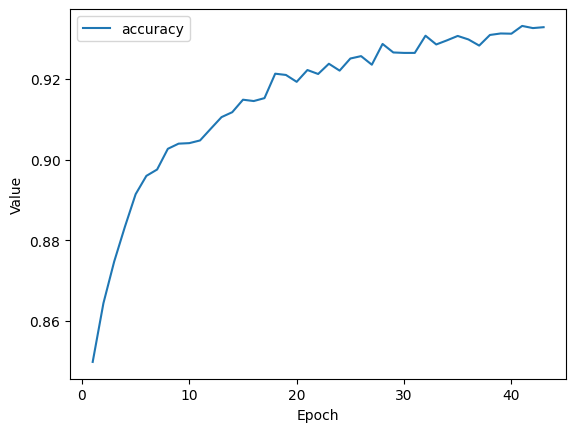

In [ ]:
#@title Train model

early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train_norm, y_onehot_train, batch_size=128, epochs=50,
                    verbose=True, callbacks=[early_stopping_callback],validation_split=0.1)

epochs = history.epoch
hist = pd.DataFrame(history.history)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs=epochs, hist=hist, list_of_metrics=list_of_metrics_to_plot)


In [ ]:
y_preds = model.predict(x_test_norm)
y_pred_labels = np.argmax(y_preds, axis=1)
y_pred_true = np.argmax(y_onehot_test, axis=1)

test_ce, test_acc = model.evaluate(x_test_norm, y_onehot_test, verbose=False)
print("Test crossentropy cost: ", test_ce)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step
Test crossentropy cost:  0.1496056616306305
Test accuracy:  0.9782999753952026
